In [1]:
import numpy as np
from scipy import linalg
from tqdm import tqdm

In [2]:
n = 4

In [3]:
A = np.diag(sorted(10*np.random.rand(n)))
B = np.diag(range(1,n+1))
X = np.random.randn(n,n)
X,_ = np.linalg.qr(X)

In [4]:
X = np.array([[-0.3244, -0.0760, 0.7003, 0.6314],
            [0.7360, -0.0324, -0.2344, 0.6343],
            [-0.1935, -0.9418, -0.2632, 0.0791],
            [-0.5618, 0.3258, -0.6208, 0.4391]])

A = np.array([[0.4690, 0, 0, 0,],
             [0, 1.1398, 0 ,0],
             [0, 0, 6.2629, 0],
             [0, 0, 0, 8.2868]])

# X = np.round(X, decimals=4)
# A = np.round(A, decimals=4)
# B = np.round(B, decimals=4)

In [5]:
print(f"A:\n{A}")
print(f"B:\n{B}")
print(f"X:\n{X}")
print(f"X.T @ X = \n{np.round(X.T@X, decimals=4)}")

A:
[[0.469  0.     0.     0.    ]
 [0.     1.1398 0.     0.    ]
 [0.     0.     6.2629 0.    ]
 [0.     0.     0.     8.2868]]
B:
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]
X:
[[-0.3244 -0.076   0.7003  0.6314]
 [ 0.736  -0.0324 -0.2344  0.6343]
 [-0.1935 -0.9418 -0.2632  0.0791]
 [-0.5618  0.3258 -0.6208  0.4391]]
X.T @ X = 
[[ 1.0000e+00  0.0000e+00 -0.0000e+00  0.0000e+00]
 [ 0.0000e+00  1.0000e+00 -0.0000e+00  0.0000e+00]
 [-0.0000e+00 -0.0000e+00  1.0000e+00  1.0000e-04]
 [ 0.0000e+00  0.0000e+00  1.0000e-04  1.0001e+00]]


In [6]:
# def minus_projected_gradient(A, B, X):
#     paranthesis_therm = (B @ X.T @ A @ X) - (X.T @ A @ X @ B)
#     return X @ paranthesis_therm

def cost(X, A, B):
    result = X.T @ A @ X @ B
    return np.trace(result)

def Gradient(X, A, B):
    return 2 * A @ X @ B

def Proj(Z, X):
    # project onto tangent space
    numerator = X @ ((X.T @ Z) - (Z.T @ X))
    return numerator/2

def Gamma(X, H, t):
    return X @ linalg.expm((t*X.T) @ H)

def Pt(X, H, t, V):
    return X @ linalg.expm((t*X.T) @ H) @ X.T @ V

In [12]:
c1 = 0.0001
c2 = 0.9
t_decay = 0.95
max_iter = 1000
iter_ls_max = 200

print_frequency = 20000

In [13]:
f_ls_list = []
for iter in tqdm(range(max_iter)):
    t = 1
    # calculate loss
    f = cost(X=X, A=A, B=B)
    # calculate gradient
    G = Gradient(X=X , A=A, B=B)
    # project onto tangent space
    G = Proj(Z=G, X=X)
    H = -G

    # Linesearch
    iter_ls = 0 # why do we continue for a fix number of steps?
    while iter_ls < iter_ls_max:
        X_next = Gamma(X=X, H=H, t=t) # next X
        f_ls = cost(X=X_next, A=A, B=B) # cost of next X
        G_update = Gradient(X=X_next, A=A, B=B) # Compute gradient of the next X
        G_update = Proj(Z=G_update, X=X_next) # Project the gradient of the next X onto the tangent space of the next X
        H_pt = Pt(X=X, H=H, t=t, V=H) # parallel transform the tanget vector
        # first cond #
        rhs = f + c1*t*np.trace(G.T @ H)
        # first_cond = f_ls < rhs
        # second cond #
        t1 = np.trace(G_update.T @ H_pt)
        t2 = c2*np.trace(G.T @ H)
        # second_cond = t1 >= t2
        if f_ls < rhs and t1>=t2:
            f_ls_list.append(f_ls)
            break
        t = t*t_decay
        iter_ls += 1          
    X = X_next

100%|██████████| 1000/1000 [00:07<00:00, 132.11it/s]


In [14]:
print(f"X at the end: \n{X}")

X at the end: 
[[ 0.15600422 -0.36013239 -0.87900216 -0.6313193 ]
 [-0.1191542  -0.49178271  0.47470479 -0.81184308]
 [-0.2652177  -0.91493775 -0.0368799   0.07419983]
 [-0.96986791  0.19340081 -0.00637954 -0.01271566]]


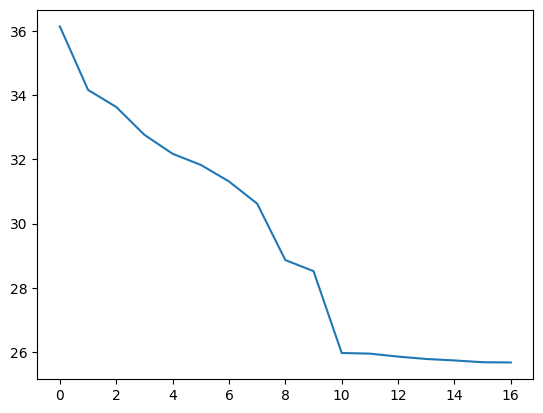

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(len(f_ls_list)), f_ls_list)
plt.show()

In [11]:
f_ls_list

[36.137172409929946,
 34.162466342833966,
 33.630566252576195,
 32.764239701568115,
 32.17412591803515,
 31.828228411400286,
 31.313080064937886,
 30.62114702448028,
 28.865267411063698,
 28.52138162471152,
 25.97306343249936,
 25.95264212126998,
 25.860172078641867,
 25.786592850070882,
 25.741005999403782,
 25.685559185378725,
 25.677410361480426]